## From Biology to AI: The Perceptron

This is the Python Jupyter Notebook for the Medium article on how to implement the Perceptron algorithm in Python.

We'll start by importing some libaries for generating a dataset and visualiying our results. The Perceptron implementation will be in NumPy.

In [136]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

So now that we imported everything we need for our implementation of the Perceptron algorithm we should generate some data to work with. Luckyly scikit learn provides a function called make_blobs that does exactly this for us.

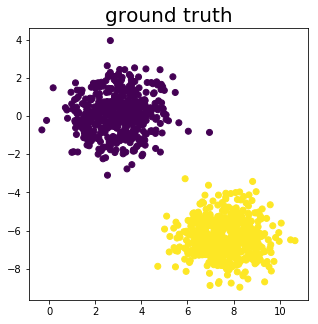

In [125]:
# Generate dataset
X, Y = make_blobs(n_features=2, centers=2, n_samples=1000, random_state=18)

# Visualize dataset
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(X[:, 0], X[:, 1], c=Y)
ax.set_title('ground truth', fontsize=20)
plt.show()

Ok by looking at the above plot we can see that both clusters can be lineary separeted. So lets start coding out the Perceptron.

First we add a bias (ones) term to the inputs.

In [126]:
# Add a bias to the X1 vector
X_bias = np.ones([X.shape[0], 3])
X_bias[:, 1:3] = X

Now we initialize the weights with zeros.

In [127]:
# Initialize weights with zeros
w = np.zeros([3, 1])

Finally, before we train the Perceptron let's define some functions that will make our life easier.

1) An activation function that returns either 1 or 0

In [128]:
def activation(x):
    return 1 if x >= 1 else 0

2) A function to calculate the unit vector of our weights vector

In [129]:
def calc_unit_vector(x):
    return x.transpose() / np.sqrt(x.transpose().dot(x))

3) A function that returns values that lay on the hyperplane

In [130]:
def calc_hyperplane(X, w):
    return np.ravel([-(w[0] + x * w[1]) / w[2] for x in X])

Last thing to do is writing the Perceptron algorithm and running it.

In [131]:
# Apply Perceptron learning rule
for _ in range(10):
    for i in range(X_bias.shape[0]):
        y = activation(w.transpose().dot(X_bias[i, :]))

        # Update weights
        w = w + ((Y[i] - y) * X_bias[i, :]).reshape(w.shape[0], 1)

Determine the class of each data point according to the weight vector our perceptron found

In [132]:
# Calculate the class of the data points with the weight vector
result = [w.transpose().dot(x) for x in X_bias]
result_class = [activation(w.transpose().dot(x)) for x in X_bias]

Calculate the unit vector of the weight vector 

In [133]:
# Calculate unit vector
w = calc_unit_vector(w).transpose()

Plot the results

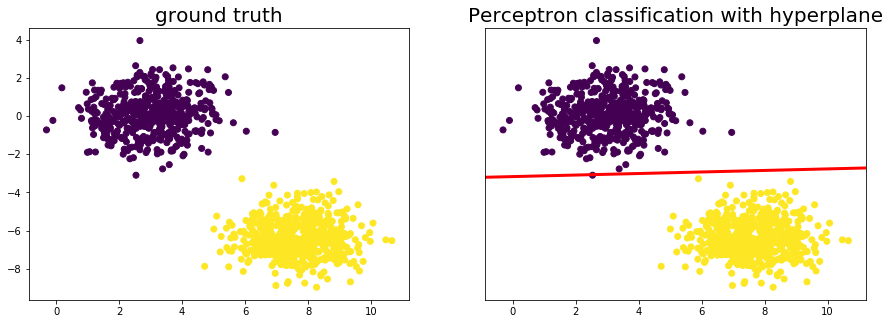

In [134]:
# Visualize results
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].scatter(X[:, 0], X[:, 1], c=Y)
ax[0].set_title('ground truth', fontsize=20)

ax[1].scatter(X[:, 0], X[:, 1], c=result_class)
ax[1].plot([-20, 20], calc_hyperplane([-20, 20], w), lw=3, c='red')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_ylim(ax[0].get_ylim())
ax[1].set_yticks([])
ax[1].set_title('Perceptron classification with hyperplane', fontsize=20)

plt.show()